In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('../raw_data/daily_data_clean.xlsx', engine='openpyxl')

In [3]:
data = data.drop(columns='Unnamed: 0')

In [5]:
data.head()

,date_issue,total_amount_claims
0,2018-09-01,168
1,2018-09-02,346
2,2018-09-03,16169
3,2018-09-04,28529
4,2018-09-05,64135


In [7]:
data['date_issue'] = pd.to_datetime(data['date_issue'],format='%m/%d/%Y %H:%M:%S')

In [8]:
data['date_issue'].dtype

dtype('<M8[ns]')

In [10]:
data.set_index('date_issue', inplace=True)

In [11]:
data

,total_amount_claims
date_issue,
2018-09-01,168
2018-09-02,346
2018-09-03,16169
2018-09-04,28529
2018-09-05,64135
...,...
2021-03-04,350720
2021-03-05,293427
2021-03-06,333658


In [35]:
# import tensorflow as tf
# tf.convert_to_tensor(X)
X = np.array(data.index, dtype='datetime64[ns]')

In [ ]:
# import tensorflow as tf
# X_tensor = tf.convert_to_tensor(X, dtype='<M8[ns]')


In [19]:
y = np.array(data['total_amount_claims'])

In [20]:
y.size

920

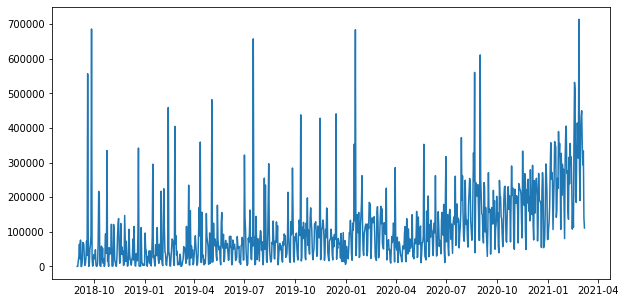

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(X, y)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
!pip install tensorflow

  Using cached numpy-1.19.5-cp38-cp38-macosx_10_9_x86_64.whl (15.6 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.14.0
    Uninstalling six-1.14.0:
      Successfully uninstalled six-1.14.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.SimpleRNN(units=1, activation='tanh'))
model.add(layers.Dense(10, activation="relu"))

model.add(layers.Dense(1, activation="linear"))

In [40]:
model.compile(loss='mae', 
              optimizer='rmsprop',
              metrics=['mae', 'mape'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=2)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=16, 
                    verbose=1, 
                    callbacks=[es])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported numpy type: NPY_DATETIME).